<a href="https://colab.research.google.com/github/sushil1902/Projects/blob/Proj/British_Airways_customer_satisfaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data preparation
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Building
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
# loading of dataset
data_ba = pd.read_csv("https://raw.githubusercontent.com/sushil1902/Datasets/main/customer_booking_British_airways.csv.csv",encoding= "ISO-8859-1")

In [ ]:
data_ba.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
data_ba.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


In [ ]:
data_ba['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
data_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
data_ba.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
data_ba.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
# handling categorical value
data_ba_categorical = data_ba.select_dtypes(include='object')
data_ba_numerical = data_ba.select_dtypes(exclude="object")

In [ ]:
data_ba_categorical.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [ ]:
data_ba_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


In [ ]:
data_ba_numerical['booking_complete'].unique()

array([0, 1])

In [ ]:
for col in data_ba_categorical:
  print(data_ba_categorical[col].value_counts())
print('\n')

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64




In [ ]:
print("Categorial Columns :",data_ba_categorical.columns)
print("Numerical Columns :",data_ba_numerical.columns)

Categorial Columns : Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')
Numerical Columns : Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')


In [ ]:
# Changing categorical to numerical columns
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
  data_ba_categorical = pd.get_dummies(data_ba_categorical,columns=[value],drop_first = True)

In [ ]:
data_ba_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_ba_categorical.shape

(50000, 910)

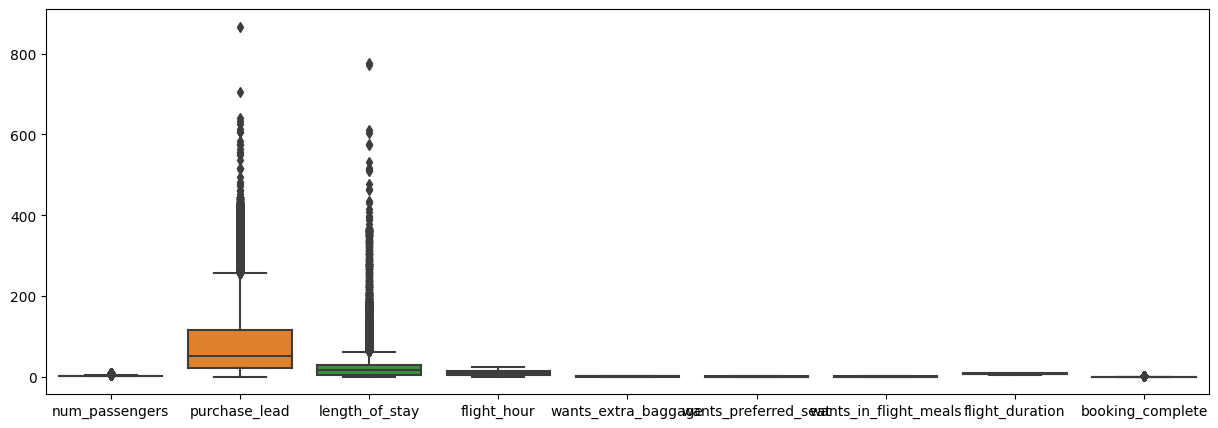

In [ ]:
# Handling outliers
# Using box plot
plt.figure(figsize=(15,5))
sns.boxplot(data=data_ba_numerical)
plt.show()

In [ ]:
#Using IQR to find outliers
data_ba_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']

for features in column_list:
  Q1 = data_ba_numerical[features].quantile(0.25)
  Q3 = data_ba_numerical[features].quantile(0.75)
  IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5* IQR

median = data_ba_numerical[features].median()

data_ba_numerical[features] = np.where(data_ba_numerical[features]<lower_limit,median,data_ba_numerical[features])
data_ba_numerical[features] = np.where(data_ba_numerical[features]>upper_limit,median,data_ba_numerical[features])

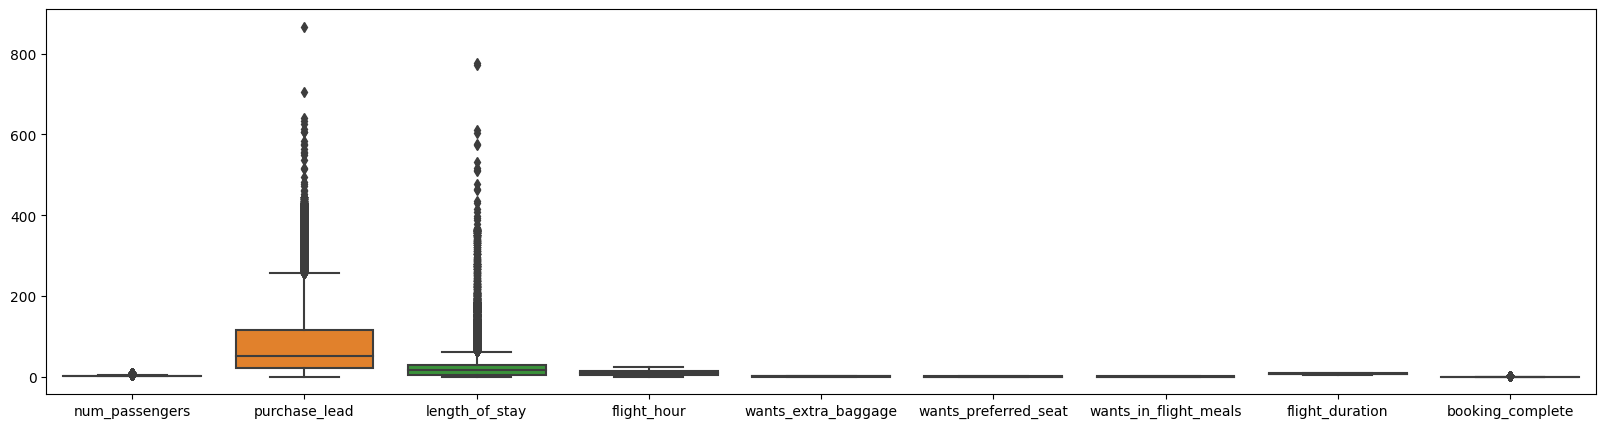

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data_ba_numerical)
plt.show()

In [ ]:
# Concatinating of numerical_data and categorical_data
concat_data = pd.concat([data_ba_categorical,data_ba_numerical],axis=1)
concat_data.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2,262,19,7,1,0,0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1,112,20,3,0,0,0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2,243,22,17,1,1,0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1,96,31,4,0,0,1,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2,68,22,15,1,0,1,5.52,0


In [ ]:
concat_data['booking_complete'].unique()

array([0, 1])

In [ ]:
# Using Machine Learning algorathim
# Separate out dependent variable and Independent variable
x = concat_data.drop(['booking_complete'],axis=1)
y = concat_data['booking_complete']

In [ ]:
# sacling of data using standard_scalar
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_sacled = pd.DataFrame(x_scaled)

In [ ]:
x_scaled

array([[-0.35578484, -0.08831973,  0.1008079 , ..., -0.64991859,
        -0.86349708, -1.17417457],
       [-0.35578484, -0.08831973,  0.1008079 , ..., -0.64991859,
        -0.86349708, -1.17417457],
       [-0.35578484, -0.08831973,  0.1008079 , ...,  1.53865425,
        -0.86349708, -1.17417457],
       ...,
       [-0.35578484, -0.08831973,  0.1008079 , ..., -0.64991859,
         1.15808151, -1.10736752],
       [-0.35578484, -0.08831973,  0.1008079 , ..., -0.64991859,
         1.15808151, -1.10736752],
       [-0.35578484, -0.08831973,  0.1008079 , ...,  1.53865425,
        -0.86349708, -1.10736752]])

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [ ]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
print(x.shape)
print(y.shape)

(50000, 918)
(50000,)


In [ ]:
# As dataset is imbalance to remove it use imblearn module and SMOTE()
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_scaled,y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


In [ ]:
x_smote = pd.DataFrame(x_smote)
x_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
0,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,0.400684,1.957530,-0.119353,-0.381764,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.579559,0.299164,-0.089844,-1.120780,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,0.400684,1.747470,-0.030824,1.465775,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.439744,2.757334,-0.388399,-0.417577,-0.425769,-0.425802,-0.004472,...,-0.004472,-0.088435,-0.579559,0.122272,0.234761,-0.936026,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.439744,-0.362669,-0.388399,-0.417577,-0.425769,2.348512,-0.004472,...,-0.004472,-0.088435,0.400684,-0.187290,-0.030824,1.096267,0.703747,-0.649919,1.158082,-1.174175


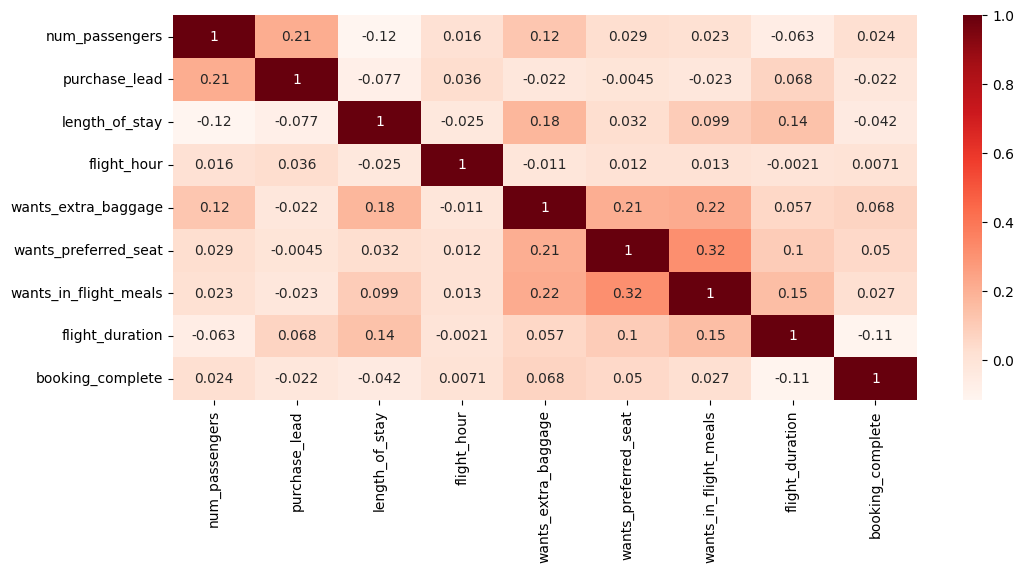

In [ ]:
# check correlation among feature which help us in getting output
plt.figure(figsize=(12,5))
sns.heatmap(data=data_ba_numerical.corr(),annot= True, cmap='Reds')
plt.show()

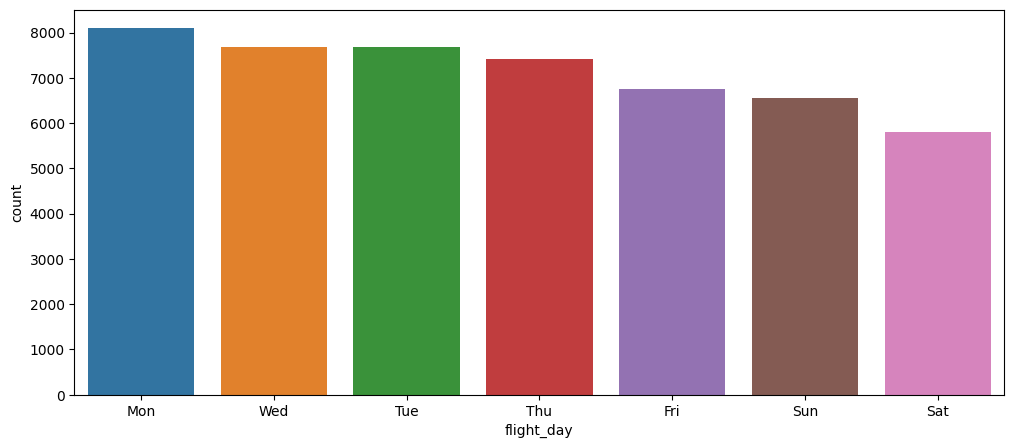

In [ ]:
# Number of flight each day of week
plt.figure(figsize=(12,5))
sns.countplot(x='flight_day',data=data_ba,order= data_ba['flight_day'].value_counts().index)
plt.show()

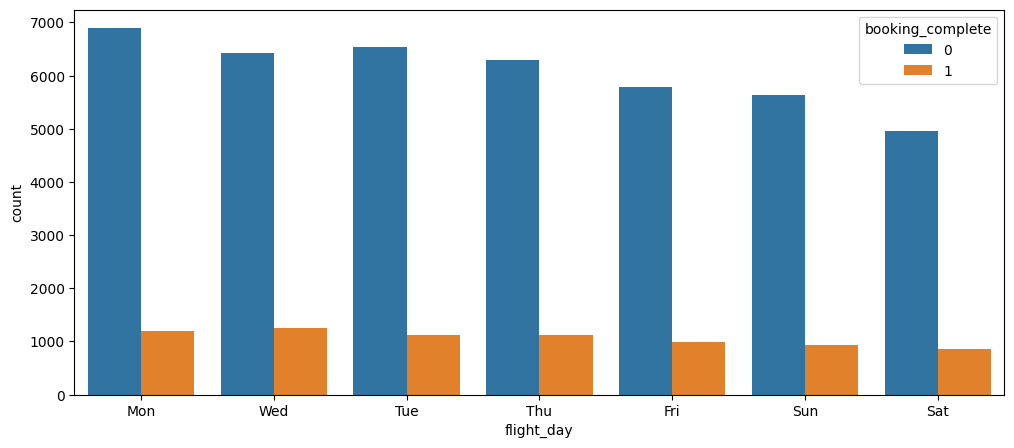

In [ ]:
# Number of flight each day of week
plt.figure(figsize=(12,5))
sns.countplot(x='flight_day',hue = "booking_complete",data=data_ba,order= data_ba['flight_day'].value_counts().index)
plt.show()

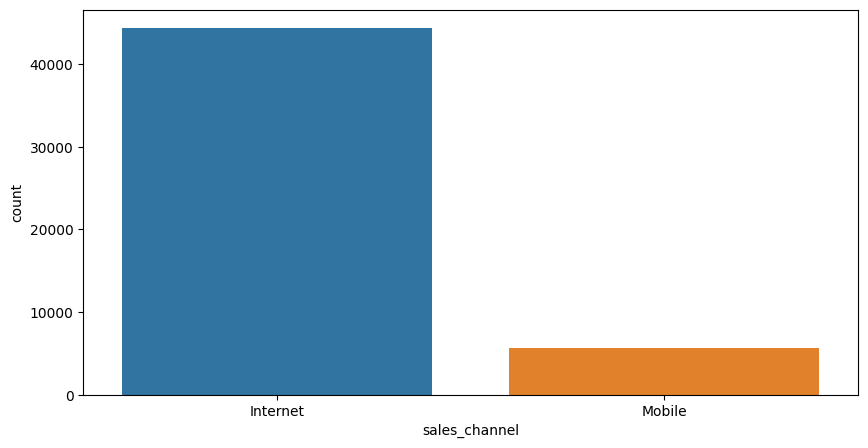

In [ ]:
# Using of booking channel
plt.figure(figsize=(10,5))
sns.countplot(x = "sales_channel",data= data_ba,order = data_ba['sales_channel'].value_counts().index)
plt.show()

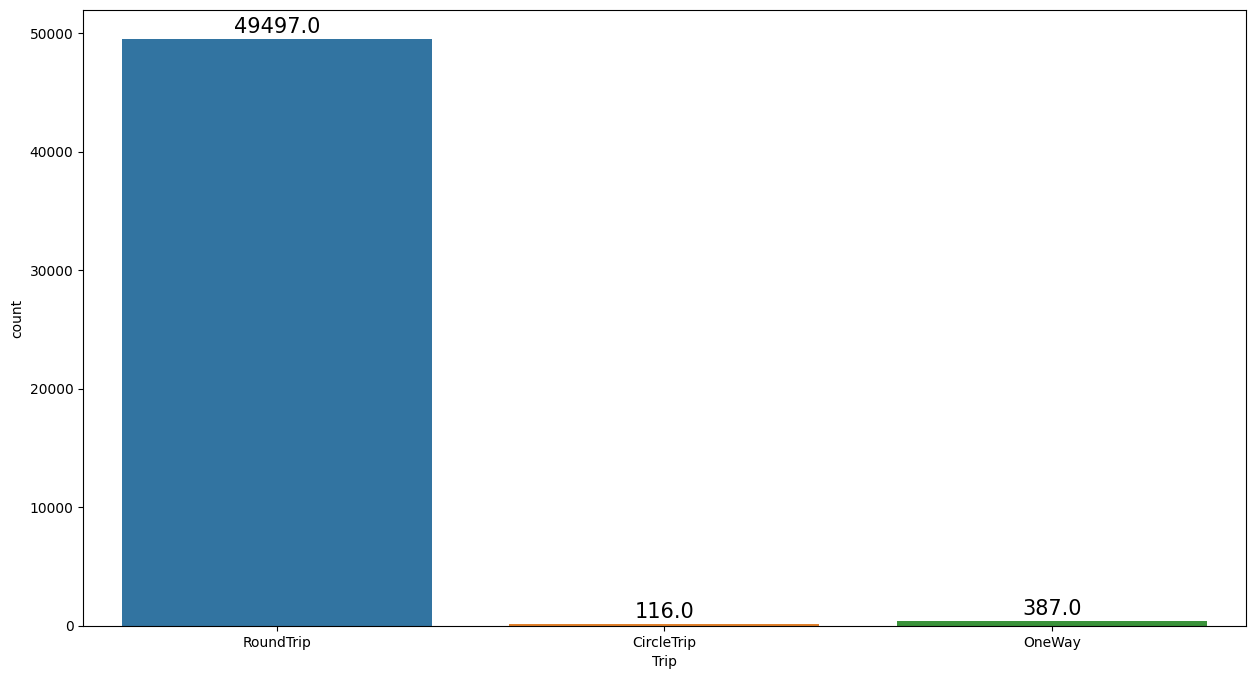

In [ ]:
# freqeuncy of trip whether -one way,round trip,circle trip
plt.figure(figsize=(15,8))
plots= sns.countplot(x='trip_type',data=data_ba)
plt.xlabel("Trip",fontsize=10)
plt.ylabel("count",fontsize= 10)

for bar in plots.patches:
  plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() /2,bar.get_height()),ha='center',va = 'center',size =15,xytext=(0,9),textcoords='offset points')

In [ ]:
# Booking origin value counts
data_ba['booking_origin'].value_counts(ascending= False)

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

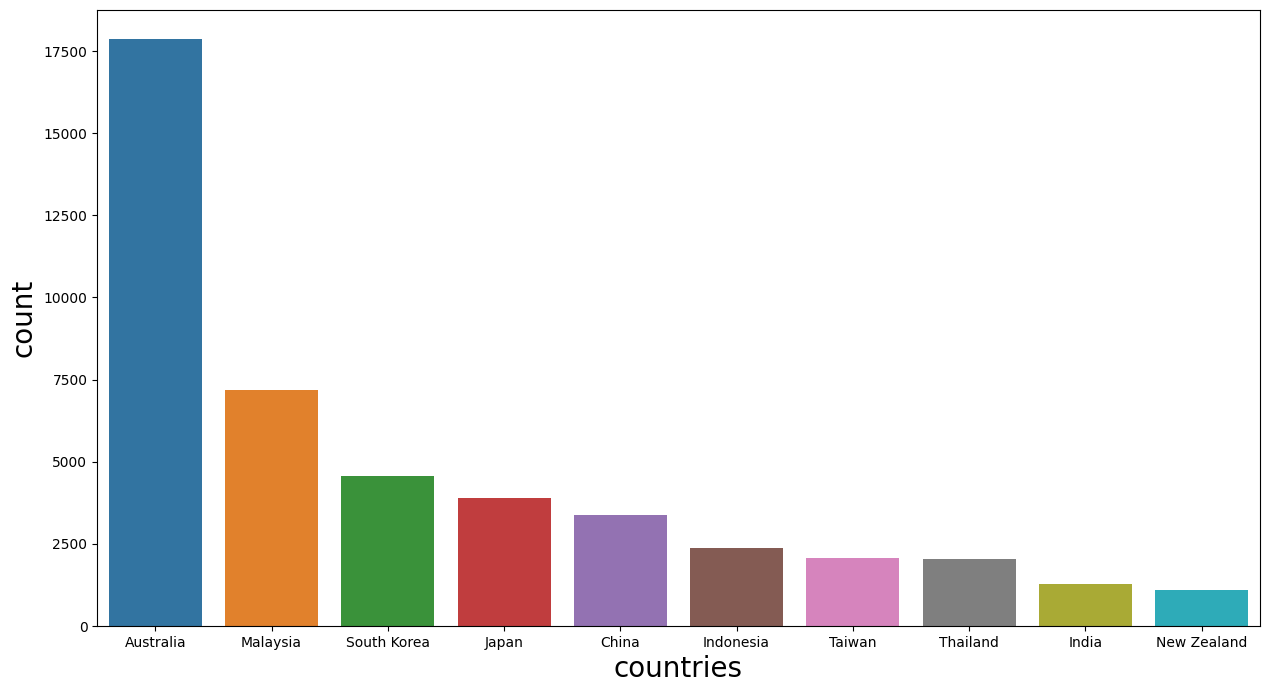

In [ ]:
# Top 10 countries in flight bookig
plt.figure(figsize=(15,8))
plots1 = sns.countplot(x='booking_origin',data = data_ba, order = data_ba['booking_origin'].value_counts().iloc[:10].index)
plt.xlabel('countries',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

for bar in plots1.patches:
  plots1.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() /2,bar.get_height()),
                ha='center',va = 'center',size =15,xytext=(0,8),textcoords='offset points')

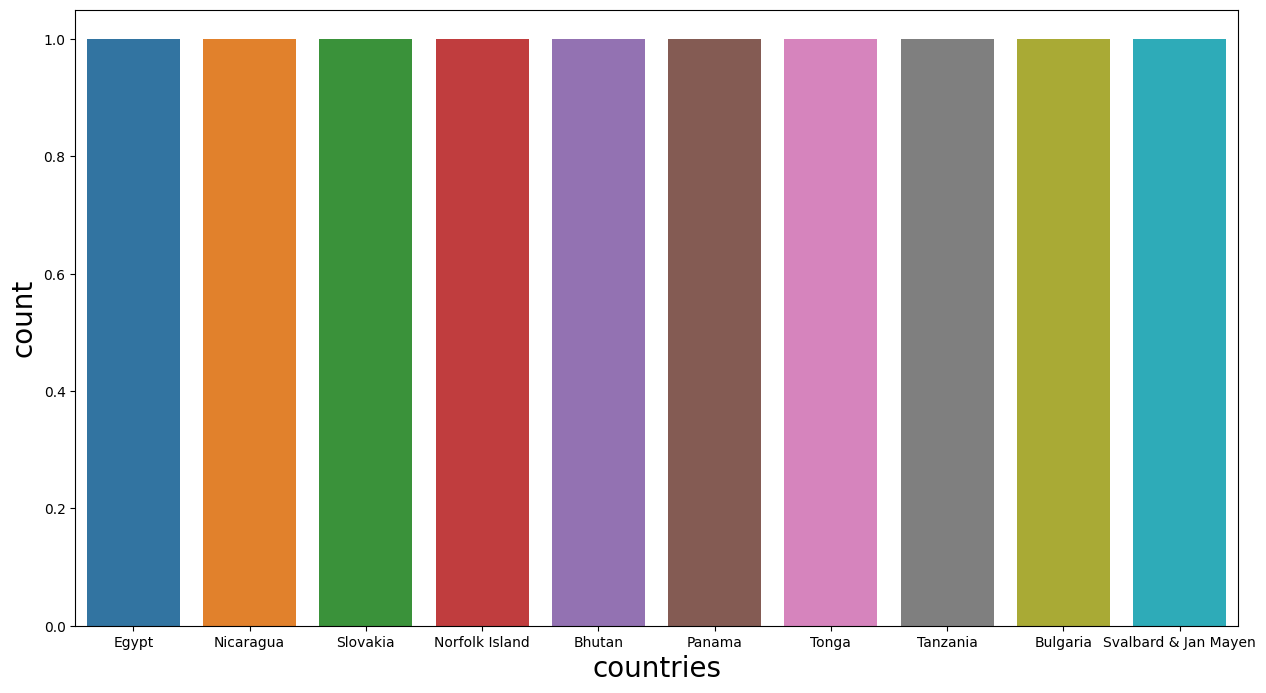

In [ ]:
# Bottom conutries
# Top 10 countries in flight bookig
plt.figure(figsize=(15,8))
plots = sns.countplot(x='booking_origin',data = data_ba, order = data_ba['booking_origin'].value_counts().iloc[-10:].index)
plt.xlabel('countries',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

for bar in plots.patches:
  plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() /2,bar.get_height()),
                ha='center',va = 'center',size =15,xytext=(0,8),textcoords='offset points')

In [ ]:
# Modeling
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size= 0.25,random_state= 100)
print("X Train Shape :", x_train.shape)
print("X test shape  :",x_test.shape)
print("Y train shape :",y_train.shape)
print("Y test shape  :",y_test.shape)

X Train Shape : (63783, 918)
X test shape  : (21261, 918)
Y train shape : (63783,)
Y test shape  : (21261,)


In [ ]:
# Using random Forest classifier
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_train = rand_forest.predict(x_train)
y_pred_rf_test = rand_forest.predict(x_test)

In [ ]:
# Classification report
print(classification_report(y_train,y_pred_rf_train))
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31833
           1       1.00      1.00      1.00     31950

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10689
           1       0.94      0.90      0.92     10572

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



In [ ]:
# confusion Metrics
print(confusion_matrix(y_train,y_pred_rf_train))
print("*"*30)
print(confusion_matrix(y_test,y_pred_rf_test))

[[31830     3]
 [    4 31946]]
******************************
[[10091   598]
 [ 1108  9464]]


In [ ]:
# Cross validation using K_fold
accuracy  = cross_val_score(rand_forest,x_train,y_train,cv=10)

In [ ]:
accuracy

array([0.92005016, 0.91236871, 0.91519047, 0.9147068 , 0.91941047,
       0.91894011, 0.91737222, 0.92097836, 0.92270304, 0.91846974])